# 🌾 Crop Recommendation System

### 📥 1. Importing Required Libraries

In [283]:
# 📌 Naive Bayes Classification with Scikit-Learn Pipeline
# This section imports all the necessary libraries for data preprocessing, modeling, evaluation, and visualization.

# 👉 Importing pandas for data manipulation
import pandas as pd

# 👉 Importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 👉 Importing functions for splitting the dataset
from sklearn.model_selection import train_test_split

# 👉 Importing preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 👉 Importing different types of Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# 👉 Importing evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 👉 Importing pipeline to streamline preprocessing and modeling steps
from sklearn.pipeline import Pipeline


### 📥  Load the Dataset


In [284]:
# Loading the crop recommendation dataset using pandas
df = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows of the dataset to understand its structure
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### 🧾: Dataset Information


In [285]:
# Display basic information about the dataset including column names, non-null values, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### 🎯 Split Features and Target


In [ ]:
# Separating the dataset into features (X) and target variable (y)

X = df.drop("label", axis=1)  # Features: All columns except 'label'
y = df["label"]               # Target: Crop label


### ✂️ Train-Test Split


In [296]:
# Splitting the dataset into training and testing sets
# 80% of the data is used for training, and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📈 Compare Accuracy of All Naive Bayes Models

In [ ]:


# Dictionary of different Naive Bayes models
process = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

# Loop through each model, train and evaluate
for name, model in process.items():
    model.fit(X_train, y_train)  # Train the model
    accuracy = model.score(X_test, y_test)  # Calculate accuracy on test set
    print(f"✅ {name} Accuracy:", accuracy)


✅ GaussianNB Accuracy: 0.9954545454545455
✅ MultinomialNB Accuracy: 0.8590909090909091
✅ BernoulliNB Accuracy: 0.022727272727272728


### 🤖 Train and Evaluate Gaussian Naive Bayes Model


In [ ]:

# Initializing the Gaussian Naive Bayes classifier
model_1 = GaussianNB()

# Training the model on the training data
X_train_G = model_1.fit(X_train, y_train)

# Predicting the target values on the test set
y_pred_g = model_1.predict(X_test)

# 📝 Evaluating the model
# Printing a detailed classification report (precision, recall, f1-score)
print("📄 Classification Report for GaussianNB:\n")
print(classification_report(y_test, y_pred_g))

# Printing the overall accuracy score
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_g))


### 📊 Confusion Matrix Heatmap for GaussianNB


C:\Users\Just Do it\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


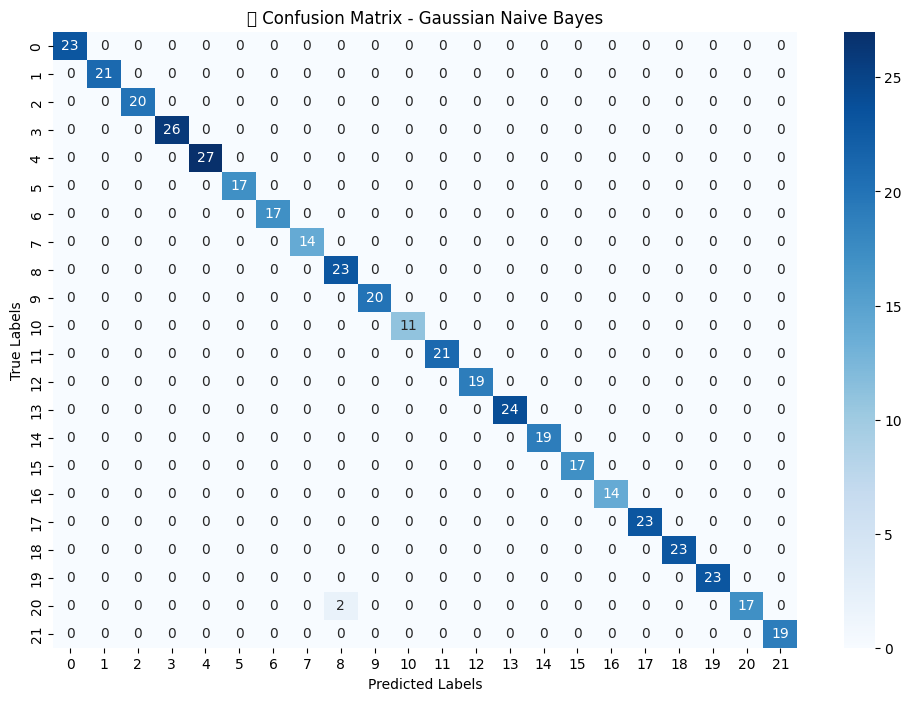

In [297]:


# Creating a figure with specific size
plt.figure(figsize=(12, 8))

# Plotting the heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_g), annot=True, fmt='d', cmap='Blues')

# Adding labels and title
plt.title("🔷 Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### 🤖 Train and Evaluate Multinomial Naive Bayes Model


In [298]:

# Initializing the Multinomial Naive Bayes classifier
model_2 = MultinomialNB()

# Training the model using training data
X_train_m = model_2.fit(X_train, y_train)

# Predicting test set results
y_pred_m = model_2.predict(X_test)

# 📝 Evaluating the model
print("📄 Classification Report for MultinomialNB:\n")
print(classification_report(y_test, y_pred_m))

# Displaying overall accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_m))


📄 Classification Report for MultinomialNB:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.60      0.60      0.60        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       0.94      1.00      0.97        17
      cotton       0.81      1.00      0.89        17
      grapes       1.00      1.00      1.00        14
        jute       0.73      0.83      0.78        23
 kidneybeans       0.94      0.85      0.89        20
      lentil       0.56      0.91      0.69        11
       maize       1.00      0.71      0.83        21
       mango       0.85      0.89      0.87        19
   mothbeans       0.53      0.38      0.44        24
    mungbean       0.79      1.00      0.88        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00    

### 📊 Confusion Matrix Heatmap for MultinomialNB


C:\Users\Just Do it\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


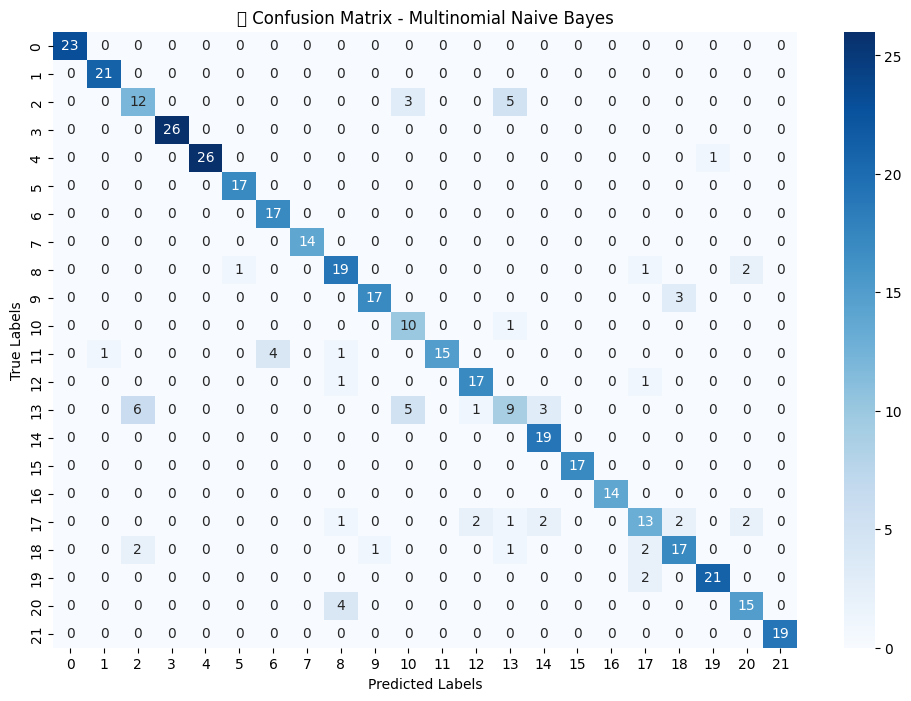

In [299]:

# Fix: use plt.figure() instead of plt.Figure()
plt.figure(figsize=(12, 8))

# Create the heatmap for the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_m), annot=True, fmt='d', cmap='Blues')

# Add titles and axis labels
plt.title("🔷 Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### 🤖 Train and Evaluate Bernoulli Naive Bayes Model


In [ ]:

# Initializing the Bernoulli Naive Bayes classifier
model_3 = BernoulliNB()

# Training the model with training data
X_train_b = model_3.fit(X_train, y_train)

# Predicting labels on the test data
y_pred_b = model_3.predict(X_test)

# 📝 Evaluating the model
print("📄 Classification Report for BernoulliNB:\n")
print(classification_report(y_test, y_pred_b))

# Displaying overall accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_b))


              precision    recall  f1-score   support

       apple       0.00      0.00      0.00        23
      banana       0.00      0.00      0.00        21
   blackgram       0.00      0.00      0.00        20
    chickpea       0.00      0.00      0.00        26
     coconut       0.00      0.00      0.00        27
      coffee       0.00      0.00      0.00        17
      cotton       0.00      0.00      0.00        17
      grapes       0.00      0.00      0.00        14
        jute       0.00      0.00      0.00        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.02      0.91      0.04        11
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       0.00      0.00      0.00        19
   muskmelon       0.00      0.00      0.00        17
      orange       0.00      0.00      0.00        14
      papaya       0.00    

c:\Users\Just Do it\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Just Do it\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Just Do it\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

### 📊  Confusion Matrix Heatmap for BernoulliNB


<Axes: >

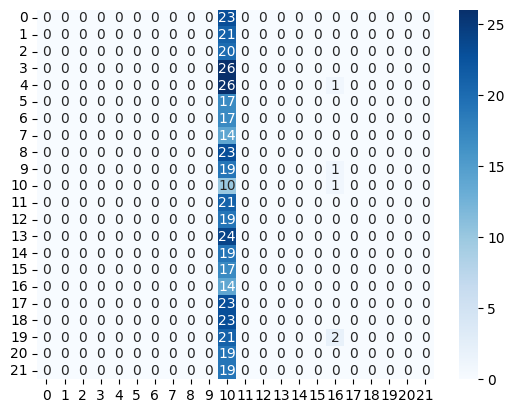

In [ ]:

# Corrected: Use plt.figure instead of plt.Figure
plt.figure(figsize=(12, 8))

# Plot the heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_b), annot=True, fmt='d', cmap='Blues')

# Add titles and axis labels
plt.title("🔷 Confusion Matrix - Bernoulli Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
